[1] "Graph - 1"

Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"

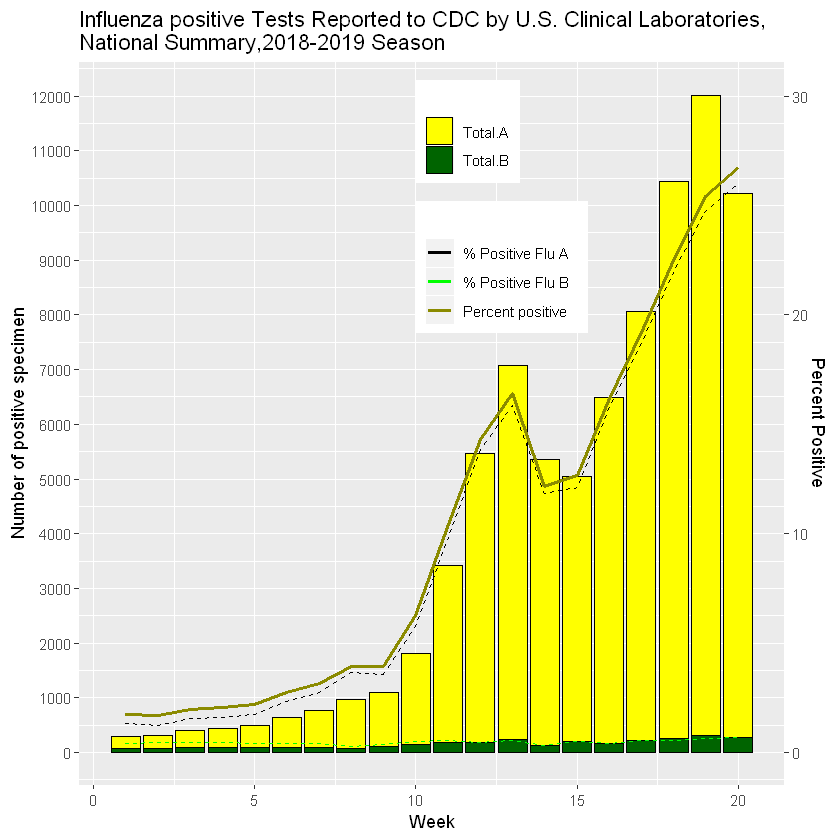

In [143]:
"Graph - 1"

library(ggplot2)
Data1<-read.csv("NationalSummary_firstChart.csv", header = TRUE)

Data1$Week<-as.numeric(as.character(Data1$Week))

Data1$WeekData <- seq.int(nrow(Data1))

variables <-Data1[,c('Total.A','Total.B','WeekData')]


require(reshape)

variables2 <- melt(variables, id.var='WeekData')

variables3 <-Data1[,c('Percent.Positive.A','WeekData')]
variables4 <- melt(variables3, id.var='WeekData')


variables5 <-Data1[,c('Percent.Positive.B','WeekData')]
variables6 <- melt(variables5, id.var='WeekData')


variables7 <-Data1[,c('X..Positive','WeekData')]
variables8 <- melt(variables7, id.var='WeekData')


ggplot()+
  geom_bar(stat="identity",colour="black",data=variables2, aes(x = WeekData, y = value, fill=variable))+
  scale_fill_manual(name="",values = c("yellow","darkgreen"),aesthetics = "fill")+
  
  geom_line(data = variables4, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+
  geom_line(data = variables6, aes(x=WeekData, y = value/0.0025,color = variable),linetype= "dashed")+
  geom_line(data = variables8, aes(x=WeekData, y = value/0.0025,color = variable),linetype="solid",size=1)+
  
  scale_color_manual(name="",values =c("black","green","yellow4"),labels=c("% Positive Flu A","% Positive Flu B","Percent positive"))+
  
  scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive"),breaks=seq(0,15000,1000))+
  xlab("Week")+
  ylab("Number of positive specimen")+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary,2018-2019 Season")+
  theme(legend.position = c(0.6, 0.8))

The above graph represents two types of Flu i.e Flu A and Flu B. It is observed that the Flu A is tested positive more than that of Flu B. But the rise in positive tests for both the Flu's is observed with the weeks approaching 2019. 

[1] "Graph 2"

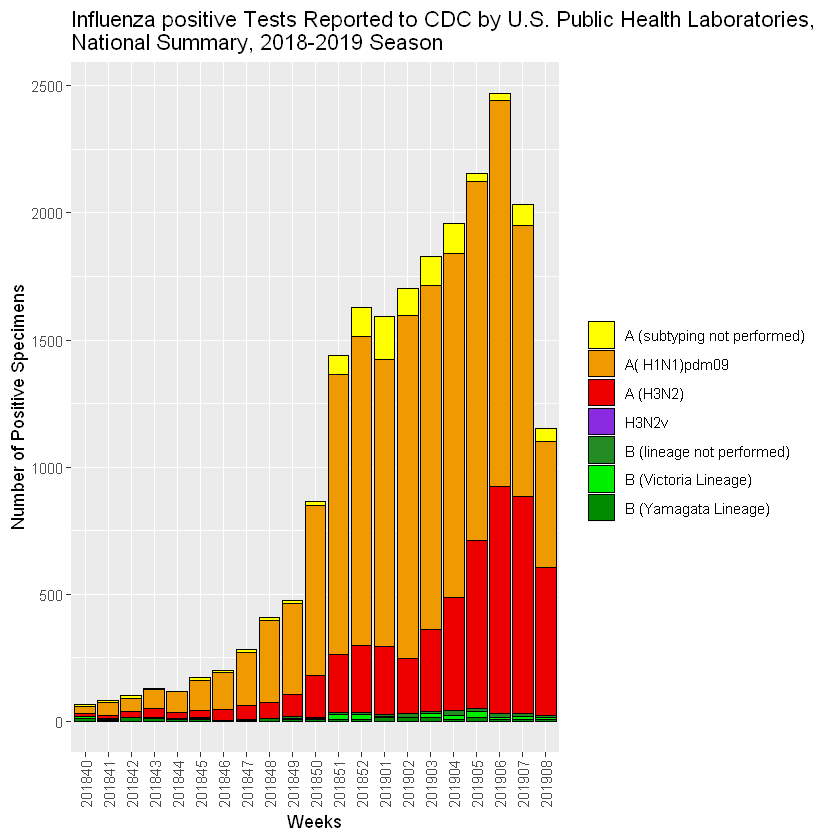

In [78]:
"Graph 2"
data2 = read.csv("positiveTested.csv",header=TRUE)

data2$Week = as.character(data2$Week)

df3 <- rbind(
    data.frame(data2$Week,"PositiveSpecimens"=data2$A.Subtyping.not.performed.,"type"="A (subtyping not performed)"),
    data.frame(data2$Week,"PositiveSpecimens"=data2$A..H1N1.pdm09,"type"="A( H1N1)pdm09"),
    data.frame(data2$Week,"PositiveSpecimens"=data2$A.H3.,"type"="A (H3N2)"),
    data.frame(data2$Week,"PositiveSpecimens"=data2$A.H3N2v.,"type"="H3N2v"),
    data.frame(data2$Week,"PositiveSpecimens"=data2$B,"type"="B (lineage not performed)"),
    data.frame(data2$Week,"PositiveSpecimens"=data2$BVIC,"type"="B (Victoria Lineage)"),
    data.frame(data2$Week,"PositiveSpecimens"=data2$BYAM,"type"="B (Yamagata Lineage)") 
  
)

ggplot(df3, aes(x=df3$data2.Week, y=df3$PositiveSpecimens, fill=df3$type)) +
  geom_bar(color="black",stat="identity")+theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+xlab("Weeks")+
  ylab("Number of Positive Specimens")+scale_fill_manual(name="",values=c("yellow1","orange2","red2","blueviolet","forestgreen","green2","green4"))+ggtitle("Influenza positive Tests Reported to CDC by U.S. Public Health Laboratories,\nNational Summary, 2018-2019 Season")


The graph shown above represents the number of positive tests observed for various types of Influenza. The number of positive tests for H1N1 is observed to be increasing till the last week of 2018. A(H3N2) is observed to be increasing whereas the number of positive tests for H1N1 remains to be the highest amongst all. 

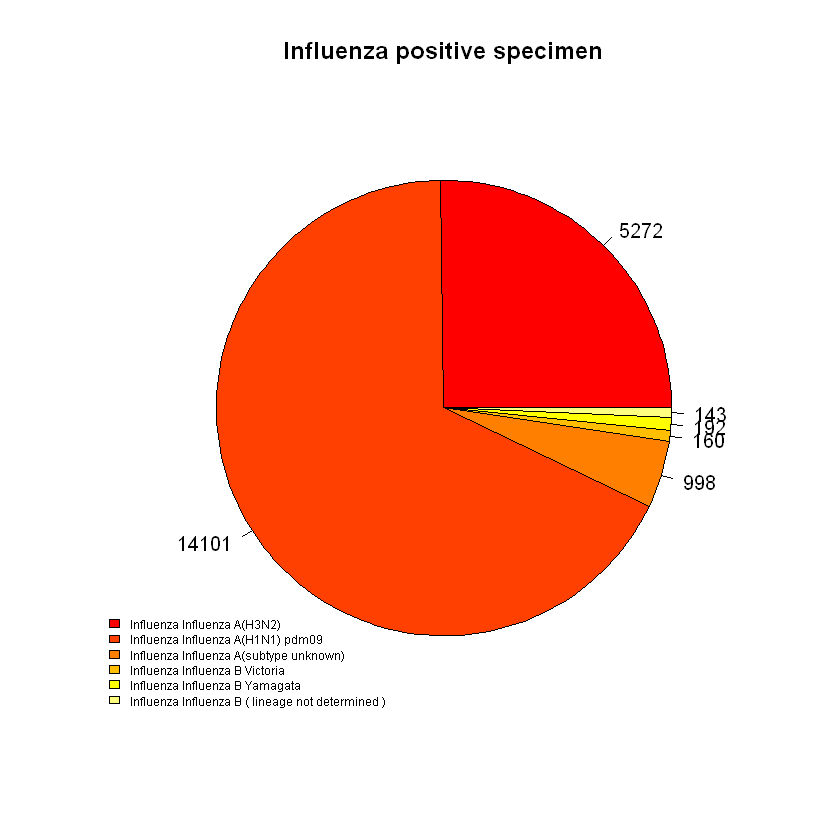

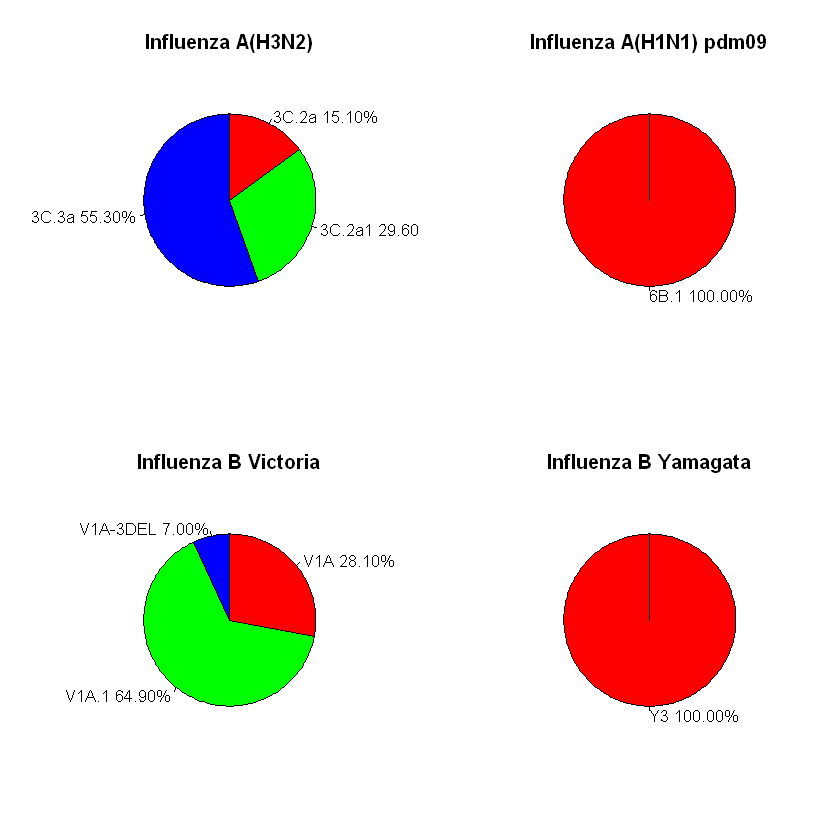

In [63]:
#pie-chart

"Graph 3"

flu2<-read.csv("Genetic.csv")
subflu2<-subset(flu2, flu2$Total_Number != 0)
x<-subflu2$Total_Number
lbls<-subflu2$X.Sub.type
pie(x,labels = x,col=heat.colors(6),main = "Influenza positive specimen",clockwise=FALSE)
legend("bottomleft",legend = paste("Influenza",subflu2$X.Sub.type), fill=heat.colors(6), bty="n",cex=0.6)



par(mfrow=c(2,2)) 

H3N2<-subset(flu2, flu2$X.Sub.type == 'Influenza A(H3N2)')
prcnt2<-as.numeric(gsub("[^0-9]", "", H3N2$X..of..Sub.type.Total))
lbls4<-H3N2$Genetic_Group


pie(prcnt2,labels = paste(H3N2$Genetic_Group,H3N2$X..of..Sub.type.Total),col=rainbow(length(lbls4)),main = "Influenza A(H3N2)",clockwise=TRUE)




pdm<-subset(flu2, flu2$X.Sub.type == 'Influenza A(H1N1) pdm09')
prcnt3<-as.numeric(gsub("[^0-9]", "", pdm$X..of..Sub.type.Total))
lbls5<-pdm$Genetic_Group


pie(prcnt3,labels = paste(pdm$Genetic_Group,pdm$X..of..Sub.type.Total),col=rainbow(length(lbls5)),main = "Influenza A(H1N1) pdm09",clockwise=TRUE)




BVict<-subset(flu2, flu2$X.Sub.type == 'Influenza B Victoria')
prcnt<-as.numeric(gsub("[^0-9]", "", BVict$X..of..Sub.type.Total))
lbls1<-BVict$Genetic_Group

pie(prcnt,labels = paste(BVict$Genetic_Group,BVict$X..of..Sub.type.Total),col=rainbow(length(lbls1)),main = "Influenza B Victoria",clockwise=TRUE)



yam<-subset(flu2, flu2$X.Sub.type == 'Influenza B Yamagata')
prcnt4<-as.numeric(gsub("[^0-9]", "", yam$X..of..Sub.type.Total))
lbls6<-yam$Genetic_Group

pie(prcnt4,labels = paste(yam$Genetic_Group,yam$X..of..Sub.type.Total),col=rainbow(length(lbls6)),main = "Influenza B Yamagata",clockwise=TRUE)



It can be observed that the number of positive specimen of Influenza are highest for A(H1N1) which can be further categorized into 6B.1. The second part of pie chart is a sub-categorization of all Influenza types except the ones that are of unknown types.  

From the above heat map it can be observed that the influenza spread level is higher in states:Texas, Alabama, Colorado
and minimal in the states: Delaware,Michigan,Ohio.


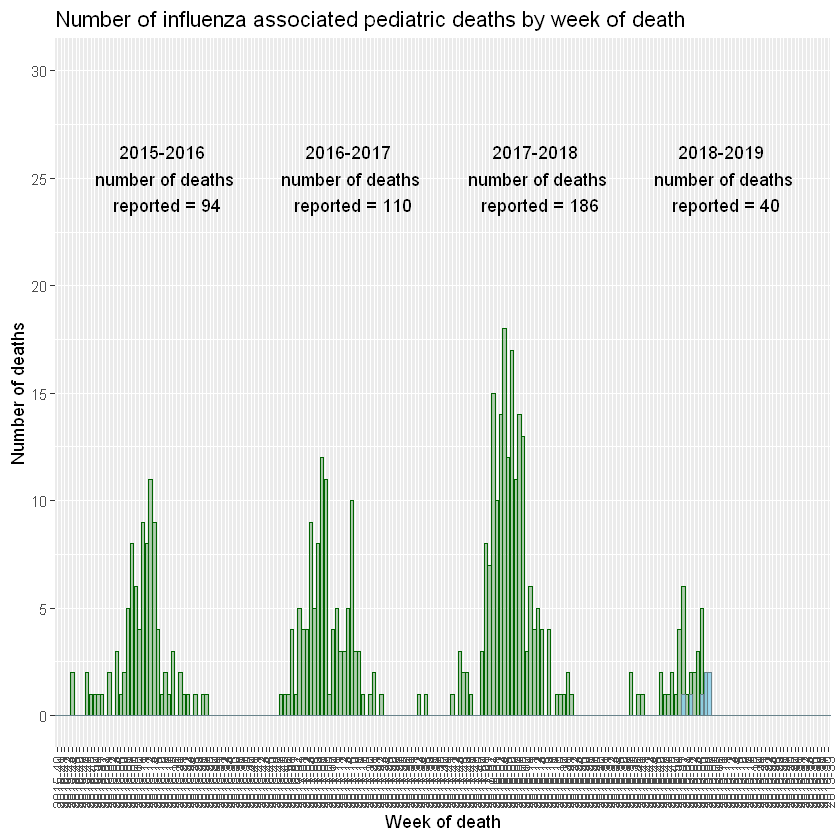

In [151]:
"GRAPH - 4"

Data3<-read.csv("Mortality.csv")
Death15_16 <-paste("2015-2016","\n number of deaths \n reported =",sum(Data3$NO_OF_DEATHS[1:53]))
Death16_17 <-paste("2016-2017","\n number of deaths \n reported =",sum(Data3$NO_OF_DEATHS[54:105]))
Death17_18 <-paste("2017-2018","\n number of deaths \n reported =",sum(Data3$NO_OF_DEATHS[106:157]))
Death18_19<-paste("2018-2019","\n number of deaths \n reported =",sum(Data3$NO_OF_DEATHS[158:208]))

ggplot(data=Data3,aes(x=WEEK_NUMBER))+geom_bar(aes(y=PREVIOUS_WEEK_DEATHS),stat="identity",position ="identity",alpha=.3,fill='darkgreen',color='darkgreen')+
  geom_bar(aes(y=CURRENT_WEEK_DEATHS),stat="identity",position ="identity",alpha=.8,fill='skyblue',color='lightblue4')+ 
  xlab("Week of death")+ylab("Number of deaths")+coord_cartesian(ylim = c(00, 30))+scale_y_continuous(breaks=seq(0,30,05))+
  annotate("text", label = Death15_16, x = 30, y = 25, color = "black")+annotate("text", label = Death16_17, x = 80, y = 25, color = "black")+
  annotate("text", label = Death17_18, x = 130, y = 25, color = "black")+annotate("text", label = Death18_19, x = 180, y = 25, color = "black")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+ggtitle("Number of influenza associated pediatric deaths by week of death")
  
  

Just after looking at the graph shown above, we can infer that the number of pediatric deaths associated with Influenza is highest for 2017-2018. 

[1] "Graph 6"

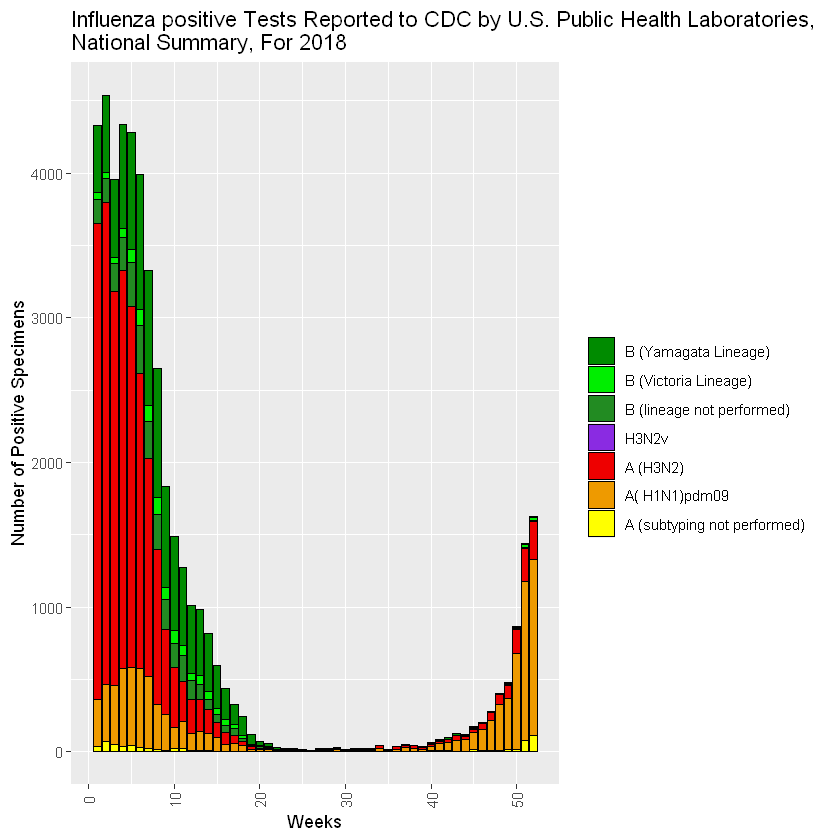

In [154]:
"Graph 5"
data3 = read.csv("WHO_NREVSS_Public_Health_Labs_2018.csv",header=TRUE)
#data3$WEEK = as.character(data3$WEEK)
df4 <- rbind(
  data.frame(data3$YEAR,data3$WEEK,"PositiveSpecimens"=data3$BYam,"type"="B (Yamagata Lineage)"),
  data.frame(data3$YEAR,data3$WEEK,"PositiveSpecimens"=data3$BVic,"type"="B (Victoria Lineage)"),
  data.frame(data3$YEAR,data3$WEEK,"PositiveSpecimens"=data3$B,"type"="B (lineage not performed)"),
  data.frame(data3$YEAR,data3$WEEK,"PositiveSpecimens"=data3$H3N2v,"type"="H3N2v"),
  data.frame(data3$YEAR,data3$WEEK,"PositiveSpecimens"=data3$A..H3.,"type"="A (H3N2)"),
  data.frame(data3$YEAR,data3$WEEK,"PositiveSpecimens"=data3$A..2009.H1N1.,"type"="A( H1N1)pdm09"),
  data.frame(data3$YEAR,data3$WEEK,"PositiveSpecimens"=data3$A..Subtyping.not.Performed.,"type"="A (subtyping not performed)")
  
  
)

ggplot(df4, aes(x=df4$data3.WEEK, y=df4$PositiveSpecimens, fill=df4$type)) +
  geom_bar(color="black",stat="identity")+theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+xlab("Weeks")+
  ylab("Number of Positive Specimens")+scale_fill_manual(name="",values=c("green4","green2","forestgreen","blueviolet","red2", "orange2","yellow1"))+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Public Health Laboratories,\nNational Summary, For 2018")


Number of positive tests for all the types of Influenza decreased exponentially reaching to almost no existence for the months May-September. After 40 weeks of 2018, the positive tests started increasing but with A(H1N1)pdm09 being the highest.

[1] "Graph 7"

Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"

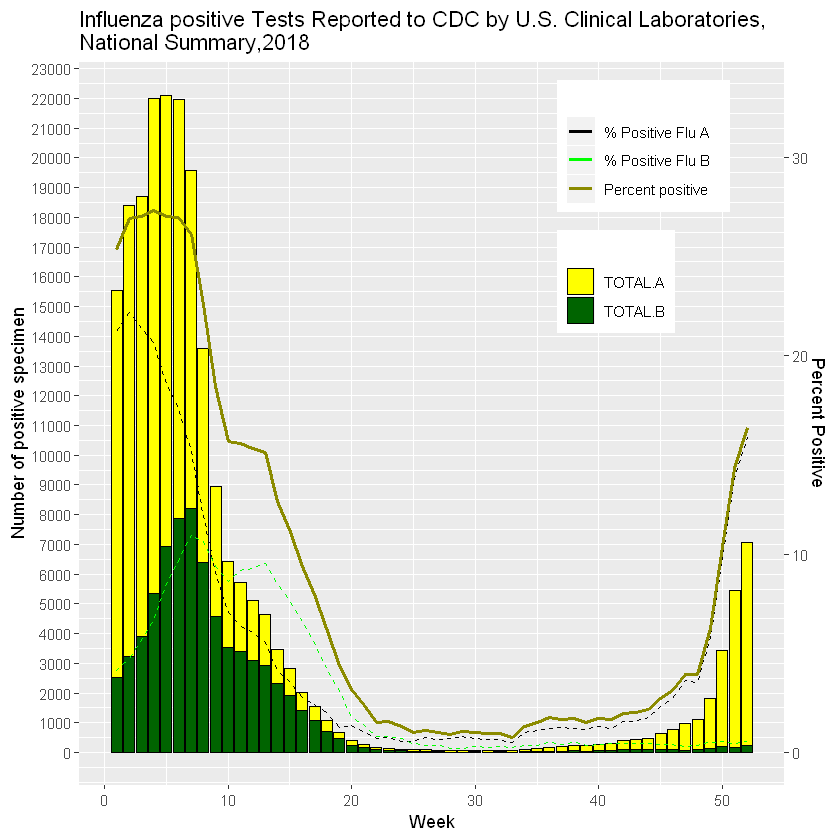

In [145]:
"Graph 6"
data4 = read.csv("WHO_NREVSS_Clinical_Labs_2018.csv",header=TRUE)


data4$WEEK<-as.numeric(as.character(data4$WEEK))

data4$WEEKData<-seq.int(nrow(data4))

variables <-data4[,c('TOTAL.A','TOTAL.B','WEEKData')]


require(reshape)

variables2 <- melt(variables, id.var='WEEKData')

variables3 <-data4[,c('PERCENT.A','WEEKData')]
variables4 <- melt(variables3, id.var='WEEKData')


variables5 <-data4[,c('PERCENT.B','WEEKData')]
variables6 <- melt(variables5, id.var='WEEKData')

variables7 <-data4[,c('PERCENT.POSITIVE','WEEKData')]
variables8 <- melt(variables7, id.var='WEEKData')


ggplot()+
  geom_bar(stat="identity",colour="black",data=variables2, aes(x = WEEKData, y = value, fill=variable))+
  scale_fill_manual(name="",values = c("yellow","darkgreen"),aesthetics = "fill")+
  
  geom_line(data = variables4, aes(x=WEEKData, y = value/0.0015,color = variable),linetype= "dashed")+
  geom_line(data = variables6, aes(x=WEEKData, y = value/0.0015,color = variable),linetype= "dashed")+
  geom_line(data = variables8, aes(x=WEEKData, y = value/0.0015,color = variable),size=1)+
  
  scale_color_manual(name="",values =c("black","green","yellow4"),labels=c("% Positive Flu A","% Positive Flu B","Percent positive"))+
  
  scale_y_continuous(sec.axis = sec_axis(~.*0.0015, name = "Percent Positive"),breaks=seq(0,45000,1000))+
  xlab("Week")+
  ylab("Number of positive specimen")+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary,2018")+
  theme(legend.position = c(0.8, 0.8))
 

Number of positive tests for all the types of Flu decreased exponentially reaching to almost no existence for the months April-August. After 40 weeks of 2018, the positive tests started increasing but with positive tests for type A being the highest. It is observed that the number of positive tests for Flu A is always the highest, that indicates more vulnerability to Flu A.

[1] "Graph 8"

Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"

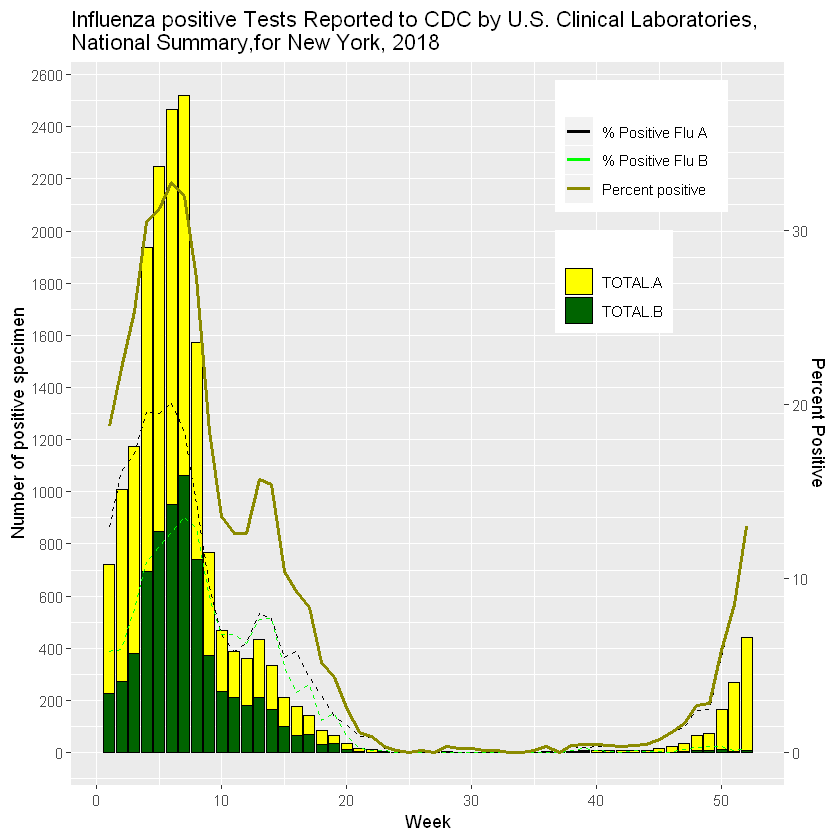

In [148]:
"Graph 7"
data5 = read.csv("WHO_NREVSS_Clinical_Labs_NewYork_2018.csv",header=TRUE)

data5$WEEK<-as.numeric(as.character(data5$WEEK))

data5$WEEKData<-seq.int(nrow(data5))

variables <-data5[,c('TOTAL.A','TOTAL.B','WEEKData')]

require(reshape)

variables2 <- melt(variables, id.var='WEEKData')

variables3 <-data5[,c('PERCENT.A','WEEKData')]
variables4 <- melt(variables3, id.var='WEEKData')


variables5 <-data5[,c('PERCENT.B','WEEKData')]
variables6 <- melt(variables5, id.var='WEEKData')

variables7 <-data5[,c('PERCENT.POSITIVE','WEEKData')]
variables8 <- melt(variables7, id.var='WEEKData')

dat$V1 <- factor(dat$V1, levels = dat$V1)

ggplot()+
  geom_bar(stat="identity",colour="black",data=variables2, aes(x = WEEKData, y = value, fill=variable))+
  scale_fill_manual(name="",values = c("yellow","darkgreen"),aesthetics = "fill")+
  
  geom_line(data = variables4, aes(x=WEEKData, y = value/0.0150,color = variable),linetype= "dashed")+
  geom_line(data = variables6, aes(x=WEEKData, y = value/0.0150,color = variable),linetype= "dashed")+
  geom_line(data = variables8, aes(x=WEEKData, y = value/0.0150,color = variable),size=1)+
  
  scale_color_manual(name="",values =c("black","green","yellow4"),labels=c("% Positive Flu A","% Positive Flu B","Percent positive"))+
  
  scale_y_continuous(sec.axis = sec_axis(~.*0.0150, name = "Percent Positive"),breaks=seq(0,2600,200))+
  xlab("Week")+
  ylab("Number of positive specimen")+
  ggtitle("Influenza positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary,for New York, 2018")+
  theme(legend.position = c(0.8, 0.8))



The above graph depicts the number of positive specimens observed for Flu in New York state. It is observed that the number of positive tests reported decreased exponentially till the 20th Week of 2018 and later on increased with the weeks approaching end of the year. This whole scenario clearly depicts that the vulnerability to Flu in New York is more during winter season. 

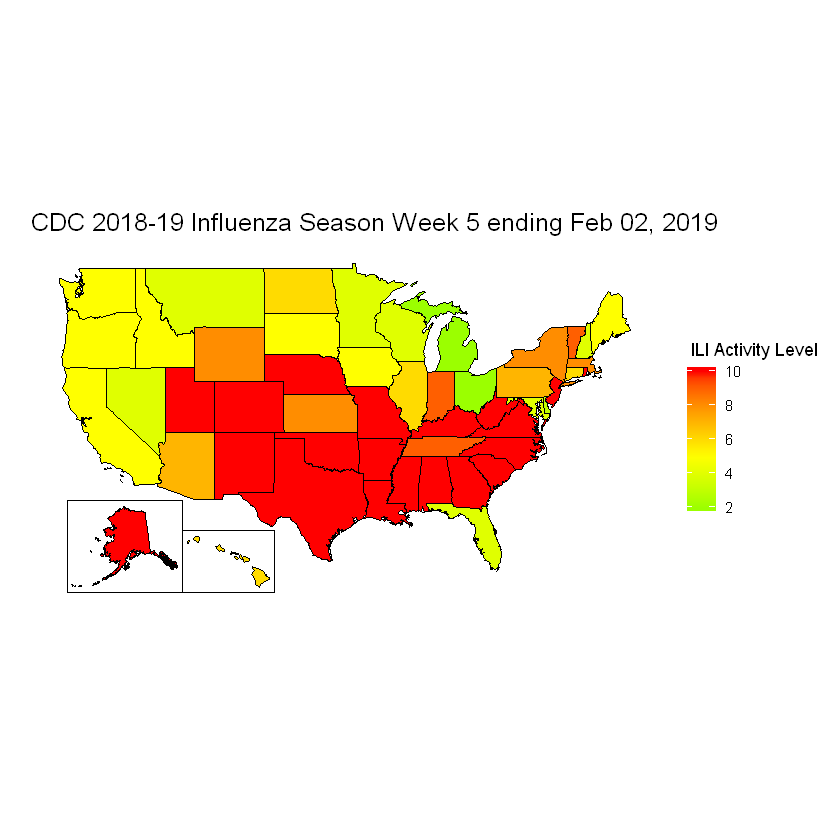

In [2]:
library(ggplot2)
library(fiftystater)
library(mapproj)
HeatMap<-read.csv("HeatMap.csv")

#changing the column name of ACTIVITY.LEVEL to level

HeatMap$Heat_level<-as.integer(gsub("[^0-9\\.]", "", HeatMap$ACTIVITY.LEVEL))
 


#imported this data to get latitude and longitudes of States
data("fifty_states") 




#Eliminate unnecessary columns in the csv

fluHeatmap <- data.frame(state = tolower(HeatMap$STATENAME), HeatMap$Heat_level)



hmap <- ggplot(fluHeatmap, aes(map_id = state)) + 
  
  geom_map(aes(fill = HeatMap$Heat_level),color="black", size=0.2, map = fifty_states) + 
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+
  scale_fill_gradient2(name = " ILI Activity Level",low="green", mid="yellow", high="red", 
                       midpoint=5, limits=range(HeatMap$Heat_level))+
  fifty_states_inset_boxes()+
  ggtitle("CDC 2018-19 Influenza Season Week 5 ending Feb 02, 2019")+
  theme(plot.title = element_text(size=15))
 
  
hmap
